# Intro TVS Regression

## Prepare Notebook

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [34]:
# Change name
import src.support as src
import rbfopt
from src.model import linearObjective, linearTVSR 

## Simulated Problem (Linear Model)

We consider the case $y = Ax + \varepsilon$ where $\varepsilon \sim N(0, 1)$. The input to the system, x is either $0$ or a $N(0,1)$ distribution. We can't actually observe $x(t)$, but rather we observe $x(t+\tau)$ where $\tau \sim N(0,1)$ Can we infer the value of a? For this imulated example we assume $A=2$.

**Questions:**: 
    - What is $t$? What is it domain of definition?

### Generate Data

In [23]:
# Define additional variables
np.random.seed(20)

A = np.array(2.0)

x = src.create_input(100, 0.2)

X, bounds = src.decompose_vector(x, return_bounds=True)
# Generate a random shift seq
real_shifts = np.round(np.random.randn(X.shape[0]))
real_shifts = np.array(real_shifts, dtype="int")

# Observed values of x
xi = np.sum(src.shift_array(X, np.array(real_shifts, dtype="int")), axis=0)

# Simulate the real effect of x
X_shift = src.shift_array(X, np.array(real_shifts, dtype="int"))
X_shift = src.hor_mul(X_shift, A)

# Build the target variable 'y'
y = np.sum(X_shift, axis=0) + np.random.randn(X_shift.shape[1])

# Define the error distributions (mean and sd for both the time and y axis)
tu=0
tsd=1
u=0
sd=1

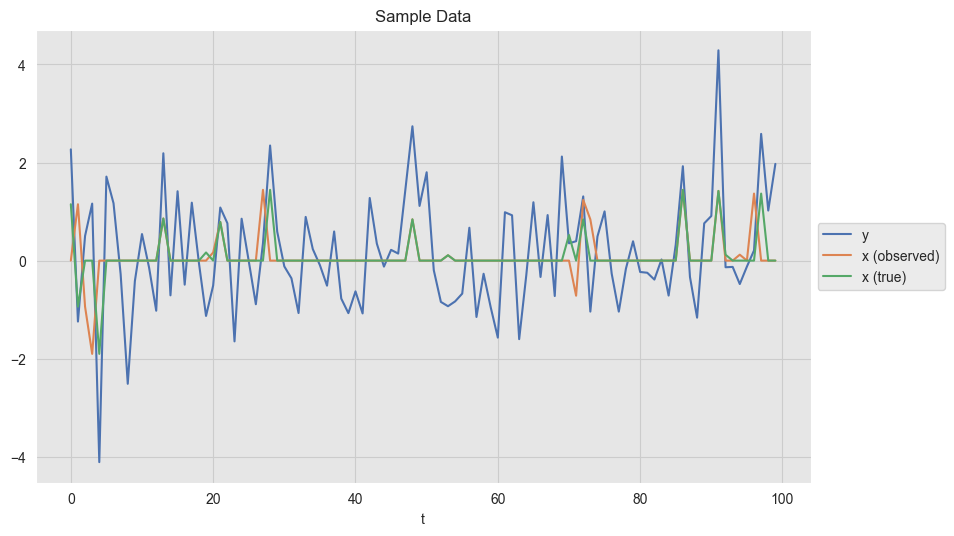

In [31]:
fig, ax = plt.subplots()
ax.plot(y, c=sns_c[0], label='y')
ax.plot(x, c=sns_c[1], label='x (observed)')
ax.plot(xi, c=sns_c[2], label='x (true)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Sample Data', xlabel='t');

Because of the time shifts, the values are not so highly correlated.

In [32]:
df = pd.DataFrame(data={'x': x, 'y': y})
df.corr()

,x,y
x,1.000000,0.187205
y,0.187205,1.000000


## Solve via Maximum Likelihood Estimation

The likelihood for the real values of the shifts (Taus) and error (in the y axis) are given below.

In [36]:
# For comparison, the log likelihood of the actual maximum value (tau-error + y axis error)?
f = linearObjective.linearTauSolver(X, y, 2, 0, 1, 0, 1)
f.objective_function(real_shifts)

154.7114277255295